In [136]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
plt.rcParams['figure.figsize'] = (20.0, 10.0)

# NASDAQ 100 Index; Index; D; NSA; 2019-01-10 => Daily - not seasonally adjusted 
tr_path = '/Users/Stellarhardwood/Downloads/STOCKMARKET_csv_2/STOCKMARKET_csv_2/data/NASDAQ100.csv'
df_nas = pd.read_csv(tr_path)

# Dow Jones Composite Average; Index; D; NSA; 2019-01-10
path = '/Users/Stellarhardwood/Downloads/STOCKMARKET_csv_2/STOCKMARKET_csv_2/data/DJCA.csv'
df_dow = pd.read_csv(path)

In [137]:
df_dow.describe()
df_dow['VALUE'].head(26).values
# noticing theres values with '.'
# need to clean this up 

array(['2976.17', '2948.09', '2856.88', '2876.05', '2895.41', '.',
       '2775.04', '2857.44', '2830.25', '2805.81', '2829.37', '2856.59',
       '2927.47', '2858.60', '2798.52', '2776.47', '2839.01', '2814.37',
       '2853.37', '2935.88', '2927.73', '2800.19', '2798.48', '2787.05',
       '2762.98', '.'], dtype=object)

In [140]:
s = pd.Series(df_dow["VALUE"].values)
d = pd.Series(df_dow['DATE'].values)
# Make strings float 
s_new = pd.to_numeric(s,errors='coerce')
# Create dframe
df_s = pd.DataFrame(s_new, columns=['value'])
# Drop misc values 
dfs = df_s.dropna()
# Create dframe for dates 
dfd = pd.DataFrame(d,columns=['dates'])
new = pd.concat([dfd,dfs],axis=1)
df_dows = new.dropna()
df_dows # 2515 rows × 2 columns


,dates,value
0,2009-01-12,2976.17
1,2009-01-13,2948.09
2,2009-01-14,2856.88
3,2009-01-15,2876.05
4,2009-01-16,2895.41
6,2009-01-20,2775.04
7,2009-01-21,2857.44
8,2009-01-22,2830.25
9,2009-01-23,2805.81
10,2009-01-26,2829.37


In [142]:
df_dows.describe()

,value
count,2515.000000
mean,5470.974823
std,1631.360867
min,2195.300000
25%,4147.435000
50%,5510.540000
75%,6428.625000
max,8909.810000


Text(0, 0.5, 'Date')

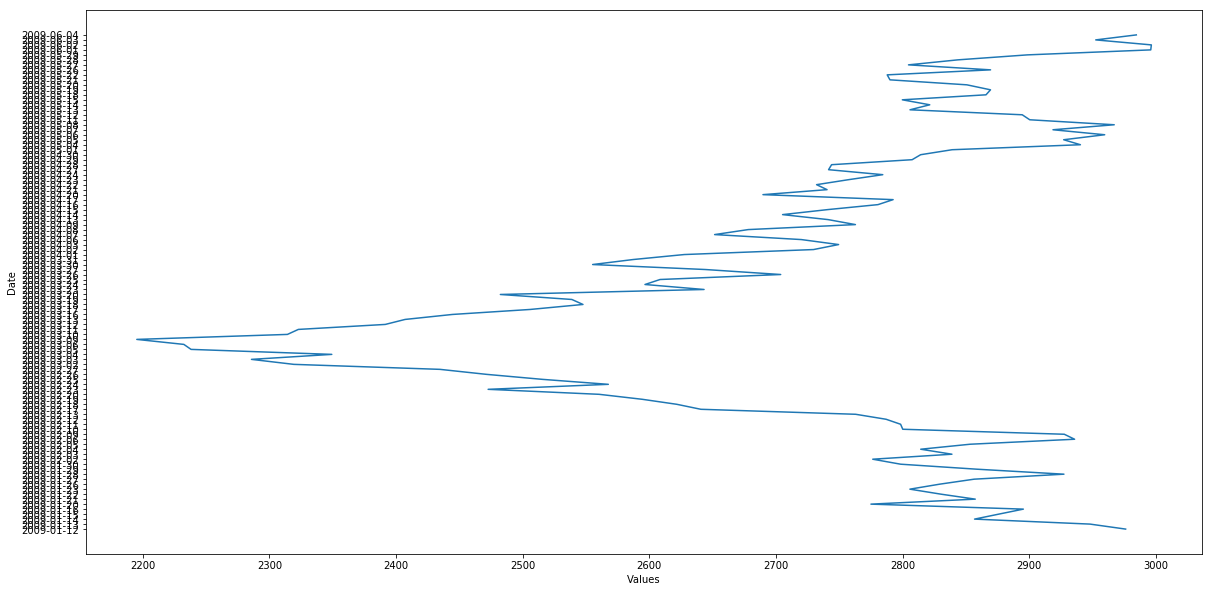

In [148]:
y= df_dows['dates'].head(100)
x= df_dows['value'].head(100)

plt.plot(x,y)
#Add axis labels 
plt.xlabel("Values")
plt.ylabel("Date")
